In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
original_dataset_dir = r"C:\Users\92317\Downloads\archive (17)\digits"

In [3]:
base_dir = r'C:\Users\92317\Downloads\archive (17)\digits-Split'

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [6]:
for category in ['0', '1','2','3','4','5','6','7','8','9']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

In [7]:
import numpy as np
import shutil

In [8]:
import os
import shutil
import numpy as np


# Define the path to your dataset
original_dataset_dir = r'C:\Users\92317\Downloads\archive (17)\digits'  # Change to the path where your digit images are located
base_dir = r'C:\Users\92317\Downloads\archive (17)\digits-Split'  # Path where the split dataset will be stored


# Directories for training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create subdirectories for each class (digits 0-9) in each split directory
for digit in range(10):  # Digits from 0 to 9
    os.makedirs(os.path.join(train_dir, str(digit)), exist_ok=True)
    os.makedirs(os.path.join(val_dir, str(digit)), exist_ok=True)
    os.makedirs(os.path.join(test_dir, str(digit)), exist_ok=True)

# Function to split and copy files
def split_data(source_dir, train_dir, val_dir, test_dir, split_ratio=(0.7, 0.15, 0.15), seed=42):
    np.random.seed(seed)
    filenames = os.listdir(source_dir)
    filenames = [f for f in filenames if os.path.isfile(os.path.join(source_dir, f))]
    
    # Shuffle filenames
    np.random.shuffle(filenames)
    
    # Calculate split sizes
    train_size = int(len(filenames) * split_ratio[0])
    val_size = int(len(filenames) * split_ratio[1])
    
    # Split filenames
    train_filenames = filenames[:train_size]
    val_filenames = filenames[train_size:train_size + val_size]
    test_filenames = filenames[train_size + val_size:]
    
    # Copy files to the respective directories
    for filename in train_filenames:
        shutil.copy(os.path.join(source_dir, filename), os.path.join(train_dir, filename))
    for filename in val_filenames:
        shutil.copy(os.path.join(source_dir, filename), os.path.join(val_dir, filename))
    for filename in test_filenames:
        shutil.copy(os.path.join(source_dir, filename), os.path.join(test_dir, filename))

# Split data for each digit (0-9)
for digit in range(10):
    digit_dir = os.path.join(original_dataset_dir, str(digit))  # Source directory for the digit
    split_data(digit_dir, os.path.join(train_dir, str(digit)), os.path.join(val_dir, str(digit)), os.path.join(test_dir, str(digit)))

print("Digit dataset split and copied successfully.")


Digit dataset split and copied successfully.


In [9]:
train_dir=r"C:\Users\92317\Downloads\archive (17)\digits-Split\train"
validation_dir=r"C:\Users\92317\Downloads\archive (17)\digits-Split\val"
test_dir=r"C:\Users\92317\Downloads\archive (17)\digits-Split\test"

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
train_generator=train_datagen.flow_from_directory(
	train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical"
)
validation_generator=test_datagen.flow_from_directory(
	validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical"
)

Found 15085 images belonging to 10 classes.
Found 3228 images belonging to 10 classes.


In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [17]:
model=models.Sequential()

In [22]:
# Define a simple CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digits 0-9

In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
total_validation_samples = validation_generator.samples
total_validation_samples

3228

In [26]:
batch_size = validation_generator.batch_size
batch_size

20

In [27]:
validation_steps = np.ceil(total_validation_samples / batch_size).astype(int)
validation_steps

162

In [28]:
his_ = model.fit(
    train_generator,
    steps_per_epoch=140,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=162,  # Ensure this covers the entire validation set
)


Epoch 1/20
140/140 [==============================] - 177s 1s/step - loss: 1.9819 - accuracy: 0.3507 - val_loss: 1.4309 - val_accuracy: 0.5527
Epoch 2/20
140/140 [==============================] - 149s 1s/step - loss: 1.0591 - accuracy: 0.6693 - val_loss: 0.8277 - val_accuracy: 0.7515
Epoch 3/20
140/140 [==============================] - 149s 1s/step - loss: 0.6489 - accuracy: 0.8029 - val_loss: 0.5632 - val_accuracy: 0.8268
Epoch 4/20
140/140 [==============================] - 147s 1s/step - loss: 0.4626 - accuracy: 0.8661 - val_loss: 0.5033 - val_accuracy: 0.8426
Epoch 5/20
140/140 [==============================] - 147s 1s/step - loss: 0.3320 - accuracy: 0.9018 - val_loss: 0.4762 - val_accuracy: 0.8519
Epoch 6/20
140/140 [==============================] - 146s 1s/step - loss: 0.2735 - accuracy: 0.9189 - val_loss: 0.3028 - val_accuracy: 0.9160
Epoch 7/20
140/140 [==============================] - 147s 1s/step - loss: 0.2112 - accuracy: 0.9321 - val_loss: 0.3057 - val_accuracy: 0.9145

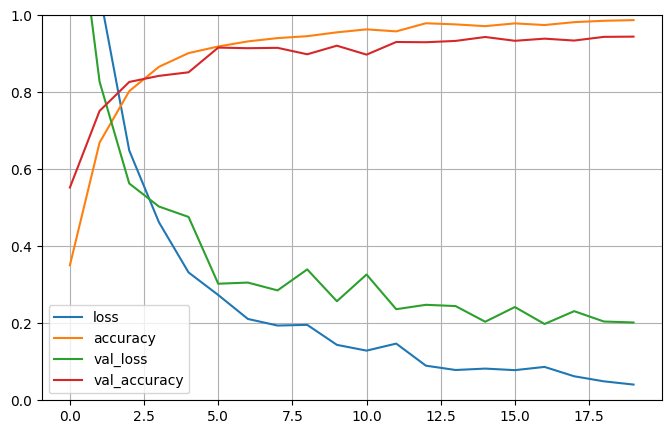

In [29]:
pd.DataFrame(his_.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
model.save("handwritting.h5")

c:\Users\92317\Desktop\ML\sklearn-env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 50ms/step


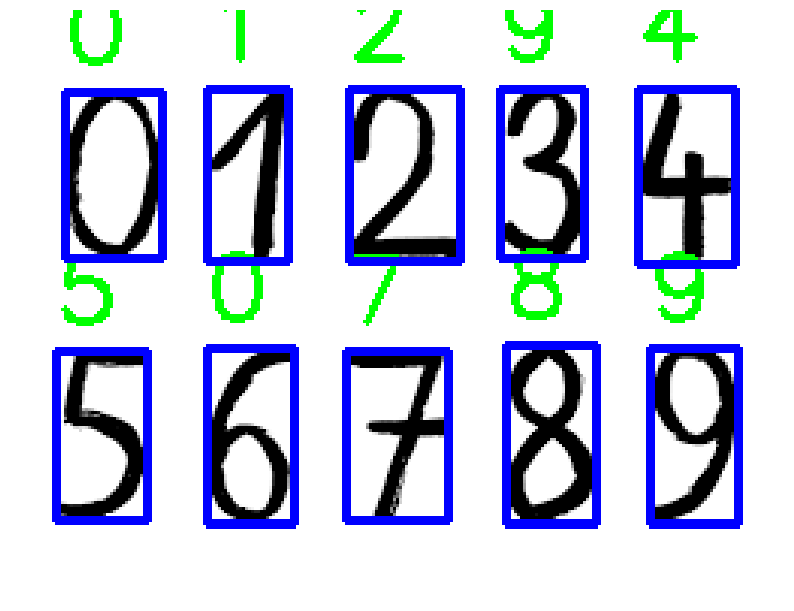

Predicted digits: [0, 0, 1, 2, 4, 5, 7, 8, 9, 9]


In [36]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('handwritting.h5')

# Load the test image (replace with the path to your image)
image_path = r'C:\Users\92317\Desktop\ML\testimg.PNG'  # Update with your image path
image = cv2.imread(image_path)

# Convert to grayscale (since digits are black on white background)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold to make the digits stand out
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours of the digits
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a list to store predicted digits
predicted_digits = []

# Loop through each contour found (each should correspond to a digit)
for contour in contours:
    # Get the bounding box around each contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Extract the region of interest (the digit)
    digit = gray[y:y+h, x:x+w]
    
    # Resize the digit image to 150x150 pixels (as required by the model)
    digit_resized = cv2.resize(digit, (150, 150))
    
    # Convert to 3-channel RGB (the model expects 3 channels)
    digit_resized = cv2.cvtColor(digit_resized, cv2.COLOR_GRAY2RGB)
    
    # Normalize the image
    digit_resized = digit_resized / 255.0
    
    # Reshape the image to (1, 150, 150, 3) as expected by the model
    digit_resized = np.reshape(digit_resized, (1, 150, 150, 3))
    
    # Predict the digit using the CNN model
    prediction = model.predict(digit_resized)
    predicted_class = np.argmax(prediction, axis=1)
    
    # Append the predicted digit to the list
    predicted_digits.append(predicted_class[0])
    
    # Draw the predicted digit on the image (optional, for visualization)
    cv2.putText(image, str(predicted_class[0]), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with predicted digits
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the predicted digits in the image
print("Predicted digits:", sorted(predicted_digits))
